<a href="https://colab.research.google.com/github/Monica-Lu/AI_ML_Research/blob/main/Neural_Network_Regression_with_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Credits to Youtube Daniel Bourke, rewrote some parts by myself

#Intro to Regression w NN in TF

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


#Creating data to view and fit

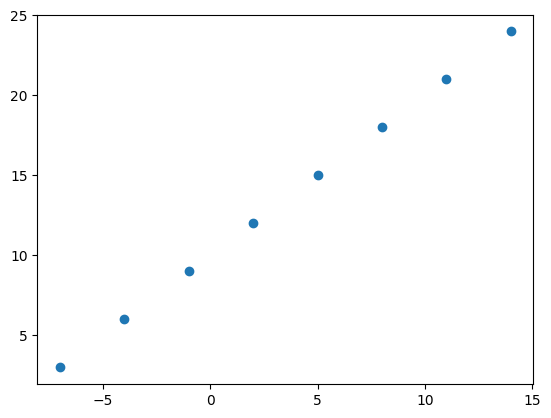

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
X = X.reshape(-1, 1)

#Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
Y = Y.reshape(-1, 1)

#Visualize
plt.scatter(X,Y)

In [ ]:
Y == X+10

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
#Create a demo tensor for housing price
house_info = tf.constant(["bedroom", "bathroom"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'bedroom', b'bathroom'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

((8, 1), (8, 1))

In [ ]:
#Turn our numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype = tf.float32)
Y = tf.cast(tf.constant(Y), dtype = tf.float32)
X, Y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([1]), TensorShape([1]))

#Model w Tensorflow
1. Create a model
- Define input and output and hidden layers
2. Compile the model
- Define Loss Function (how wrong it is)
- Define Optimizer (how to improve the patterns its learning)
- Define evaluation metrics (what we can use to interpret the performance of our model)
3. Fitting a model

Tensorflow NN Visualization
https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.61219&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [ ]:
#Set random seed
tf.random.set_seed(42)

#Create a model w Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# ^same as
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #stochastic gradient descent
              metrics=["mae"]) #mean absolute error

# Fit the model
model.fit(X, Y, epochs = 5)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step - loss: 19.6729 - mae: 19.6729
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 19.3916 - mae: 19.3916
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 19.1104 - mae: 19.1104
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 18.8291 - mae: 18.8291
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 18.5479 - mae: 18.5479


In [ ]:
# Check out X and Y
X, Y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]], dtype=float32)>)

In [ ]:
#Try and make a prediction using our model
y_pred = model.predict(tf.constant([[17.0]]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[-17.917]], dtype=float32)

In [ ]:
y_pred + 11

array([[-6.917]], dtype=float32)

#Improve a model

1. Create a model - add more layers, increase the number of hidden units(neurons) within each of the hidden layers, change the activation function of each layer
2. Compiling a model - change the optimization function or the learning rate of the optimization function
3. Fitting a model - fit a model for more epochs (leave it training for longer) or for more data

In [ ]:
#set random seed
tf.random.set_seed(42)

#Create a bigger model
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

#Compile a model
model1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae'])

#Fit a model
model1.fit(X,Y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.8652 - mae: 12.8652
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 12.5045 - mae: 12.5045
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 12.1552 - mae: 12.1552
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 11.7988 - mae: 11.7988
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 11.4266 - mae: 11.4266
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 11.0455 - mae: 11.0455
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 10.6431 - mae: 10.6431
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 10.2303 - mae: 10.2303
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 9.8302 - mae: 9.8302
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 9.4549 - mae: 9.4549
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 9.0561 - mae: 9.0561
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 8.6335 - mae: 8.6335
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━

In [ ]:
#adjusted model
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])
model1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
               metrics=["mae"])
model1.fit(X,Y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step - loss: 12.8761 - mae: 12.8761
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 12.1516 - mae: 12.1516
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 11.4273 - mae: 11.4273
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 10.7022 - mae: 10.7022
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.9737 - mae: 9.9737
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 9.2387 - mae: 9.2387
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 8.4939 - mae: 8.4939
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 7.7359 - mae: 7.7359
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 6.9620 - mae: 6.9620
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 6.8160 - mae: 6.8160
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 7.1503 - mae: 7.1503
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.3639 - mae: 7.3639
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
X, Y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]], dtype=float32)>)

In [ ]:
model1.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[26.057266]], dtype=float32)

#Evaluating a model
Build a model -> fit it -> evaluate <-> improve

VISUALIZE
- The data
- Training of a model
- Model itself
- Prediction of the model

In [ ]:
#Make a bigger data set
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

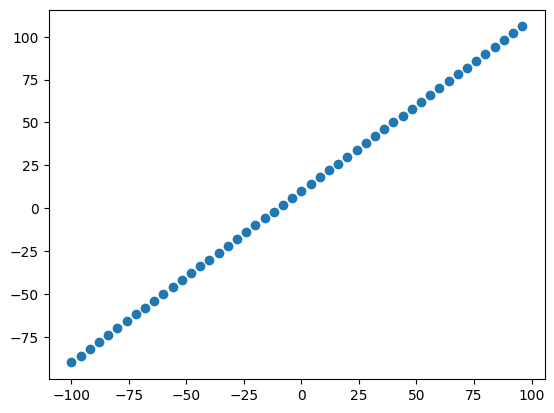

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)

#The 3 sets
- Training set - the model learns from this data, which is typically 70%-80% of the total data you have available
- Validation set - the model gets tuned on this data, which is typically 10%-15% of the data available
- Test set - the model gets evaluated on this data to test what it has learned, this set is typically 10%-15% of the total data available

In [ ]:
#Check the length of how many samples we have
len(X)

50

In [ ]:
#Split the data into train and test sets
X_train = X[:40] #first 40 are training examples (80% of data)
Y_train = Y[:40]

X_test = X[40:] #last 10 is testing examples (20% of data)
Y_test = Y[40:]

len(X_train), len(X_test), len(Y_train), len(Y_test)


(40, 10, 40, 10)

#Visualize the data

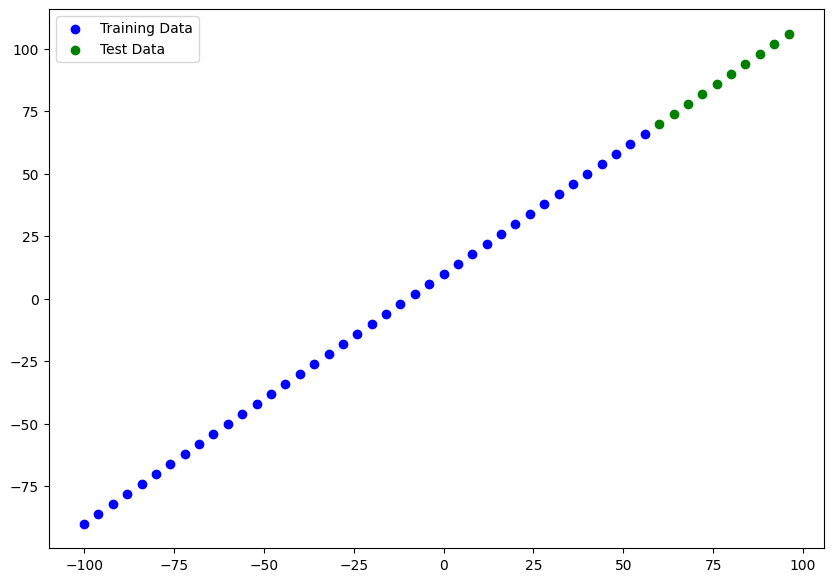

In [ ]:
plt.figure(figsize = (10,7))
#Plot training data in blue
plt.scatter(X_train, Y_train, c="b", label = "Training Data")
#Plot test data in green
plt.scatter(X_test, Y_test, c="g", label = "Test Data")
plt.legend()

#Visualize the model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#model.fit(X_train, Y_train, epochs=100)

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,), name="input_layer"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1, name = "output_layer")
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

- Total params - total number of parameters in the model
- Trainable parameters - parameters(patterns) the model can update as it trains
- Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during *transfer learning*)

MIT's intro to deep learning for more in depths

In [ ]:
model.fit(X_train, Y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 18.7965 - mae: 18.7965 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 18.0816 - mae: 18.0816
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 17.3686 - mae: 17.3686
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 16.6563 - mae: 16.6563
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 15.9655 - mae: 15.9655
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 15.2744 - mae: 15.2744
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 14.5826 - mae: 14.5826
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 13.9064 - mae: 13.9064
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 13.2410 - mae: 13.2410
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.5775 - mae: 12.5775
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.9440 - mae: 11.9440
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 11.3134 - mae: 11.3134
Epoch 13/100
2/2 ━━━━━━━

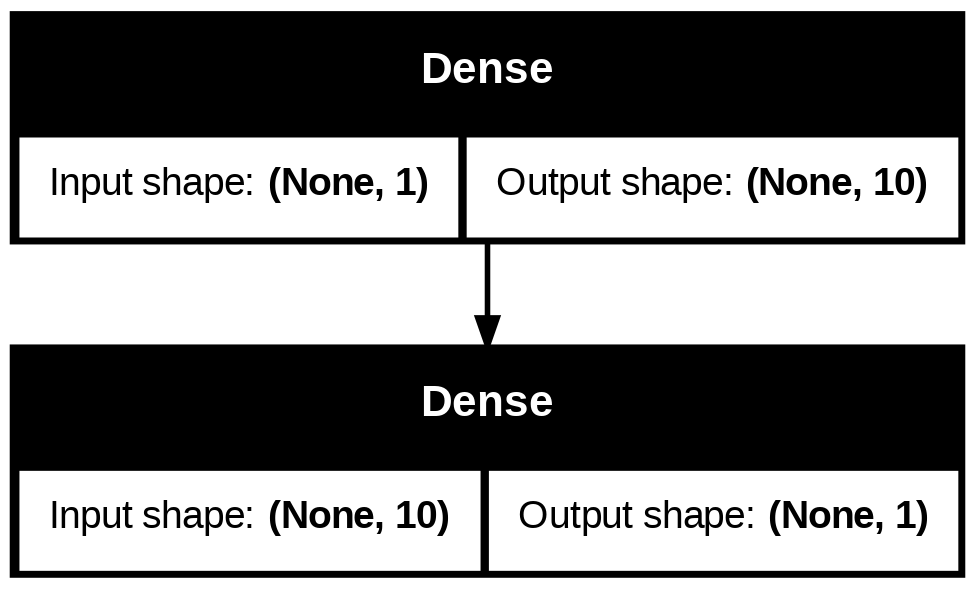

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes = True)

#Visualize our model's predictions

To visualize predictions, it's good idea to plot them against the ground truth labels

Often you'll see this in the form of y_test or y_true vs y_pred (ground truth versus your model)

In [ ]:
Y_pred = model.predict(X_test)
Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[54.69491 ],
       [58.272038],
       [61.849155],
       [65.42628 ],
       [69.0034  ],
       [72.58052 ],
       [76.157646],
       [79.73477 ],
       [83.31189 ],
       [86.88901 ]], dtype=float32)

In [ ]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
#Let's create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = Y_train,
                     test_data = X_test,
                     test_labels = Y_test,
                     predictions = Y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize = (10,7))
  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label = "Training Data")
  #Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label = "Test Data")
  #Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label = "Predictions")
  #Show legend
  plt.legend()

#Evaluate our model's predictions with regression evaluation metrics
- Different evaluation metrics to evalute model performance

For regression
- MAE - mean absolute error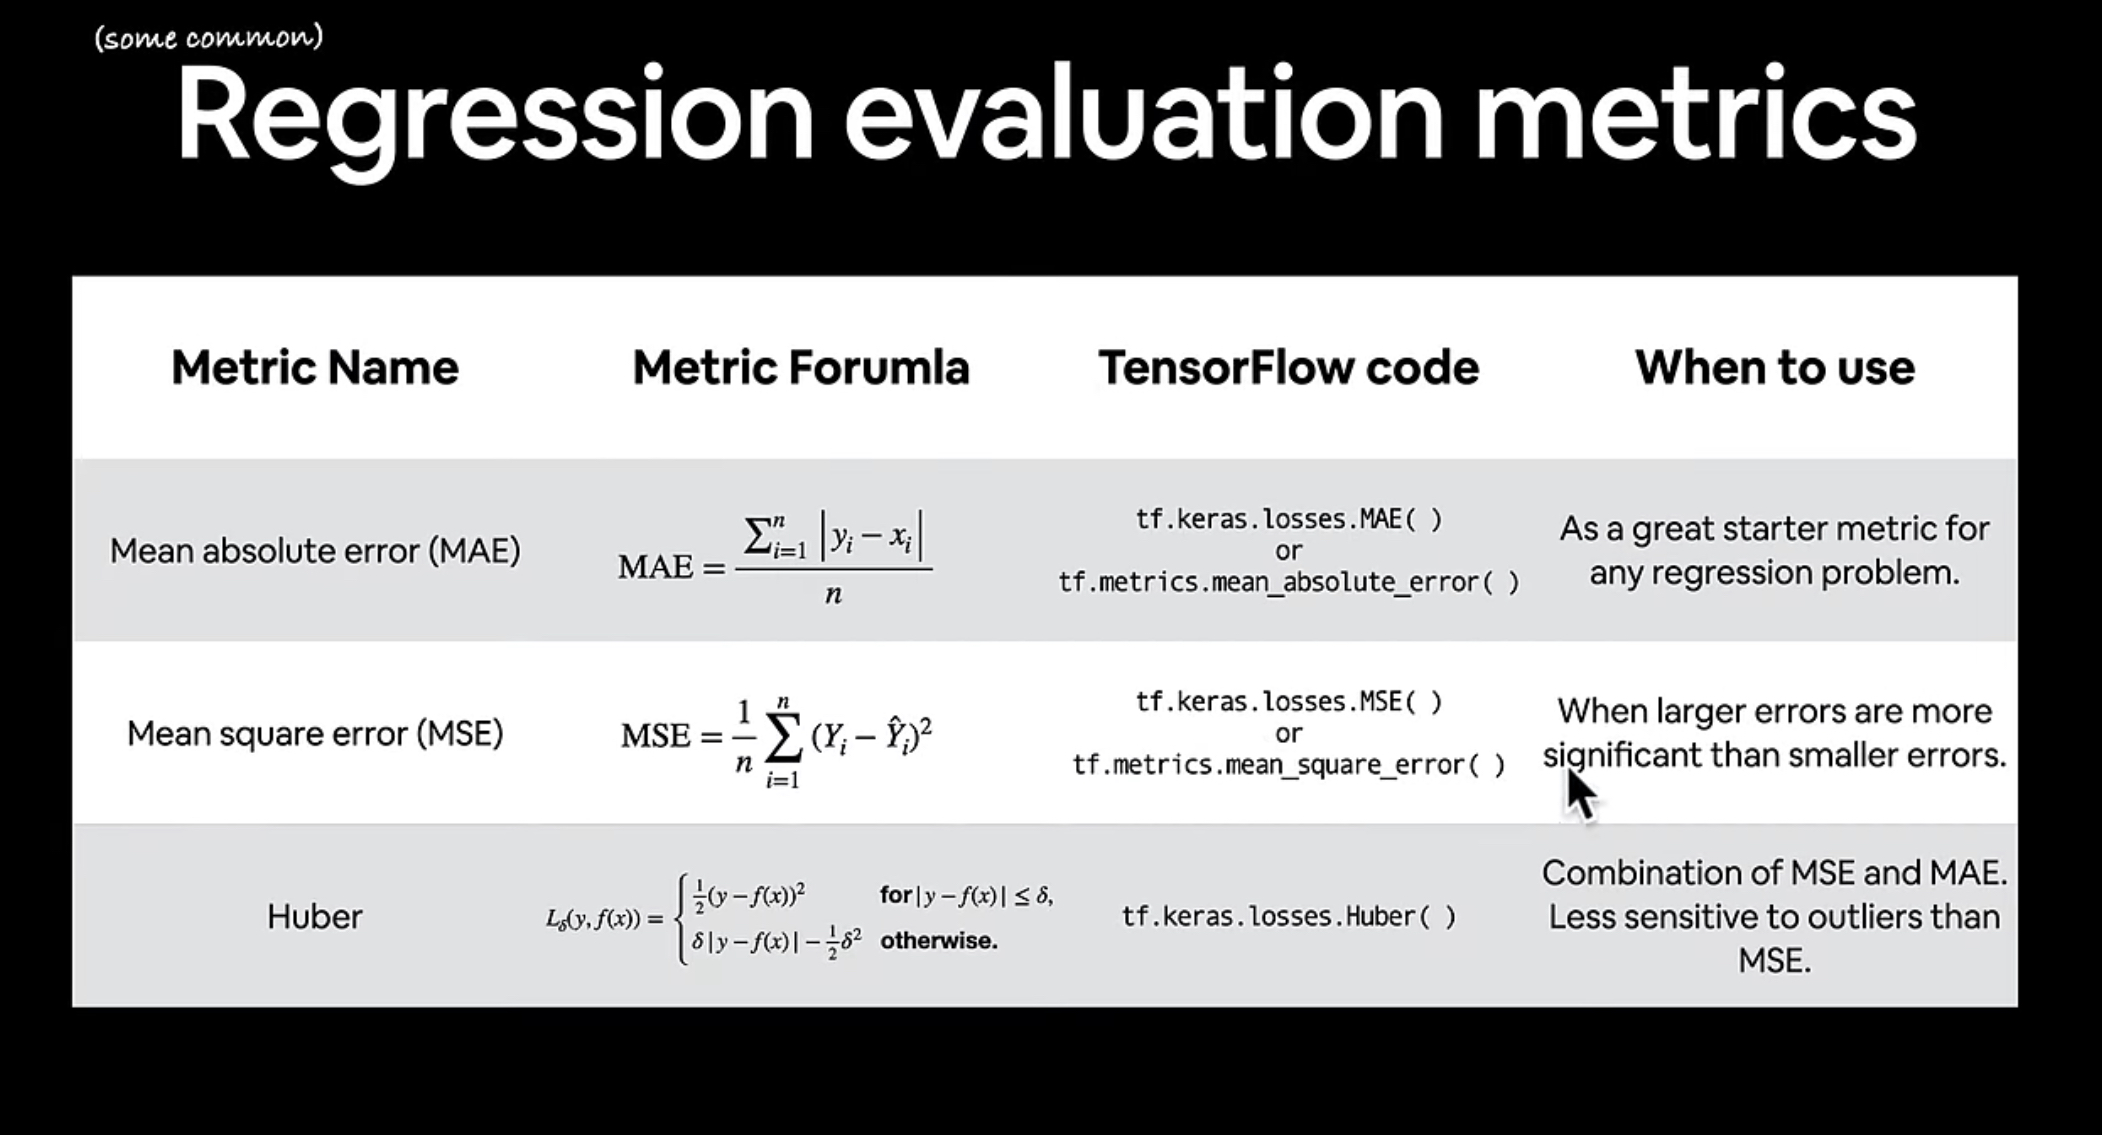
- MSE - mean square error

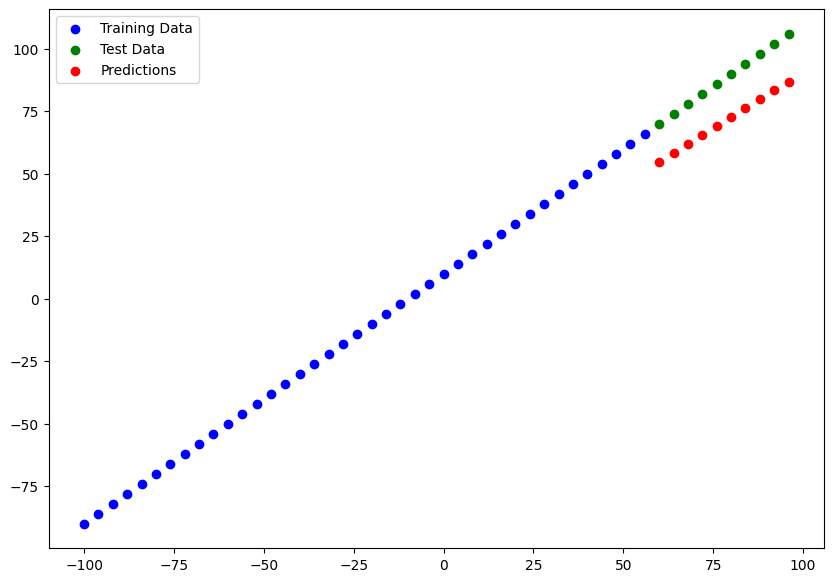

In [ ]:
plot_predictions(train_data = X_train,
                 train_labels = Y_train,
                 test_data = X_test,
                 test_labels = Y_test,
                 predictions = Y_pred)

In [ ]:
model.evaluate(X_test, Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 17.2080 - mae: 17.2080


[17.208038330078125, 17.208038330078125]

In [ ]:
Y_pred

array([[54.69491 ],
       [58.272038],
       [61.849155],
       [65.42628 ],
       [69.0034  ],
       [72.58052 ],
       [76.157646],
       [79.73477 ],
       [83.31189 ],
       [86.88901 ]], dtype=float32)

In [ ]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
#Calculate the mean absolute error
mae = tf.keras.losses.mae(Y_test, Y_pred)
#same as tf.metrics.mae(y_true = Y_test, y_pred = Y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([15.305092 , 15.7279625, 16.150845 , 16.573723 , 16.996597 ,
       17.41948  , 17.842354 , 18.265228 , 18.68811  , 19.110992 ],
      dtype=float32)>

In [ ]:
tf.squeeze(Y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([54.69491 , 58.272038, 61.849155, 65.42628 , 69.0034  , 72.58052 ,
       76.157646, 79.73477 , 83.31189 , 86.88901 ], dtype=float32)>

In [ ]:
#Calculate the mean absolute error
mae = tf.metrics.mae(y_true = Y_test, y_pred = tf.squeeze(Y_pred))
mae
#same as model evaluate loss

<tf.Tensor: shape=(), dtype=float32, numpy=17.208038330078125>

In [ ]:
#Calculate the mean square error
mse = tf.keras.losses.mse(Y_test, tf.squeeze(Y_pred))
#same as tf.metrics.mse(y_true = Y_test, y_pred = tf.squeeze(Y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=297.5918884277344>

#Run experiments to improve model
1. Get more data more examples for model to train on
2. Make the model larger(more layers or more hidden units in each layer)
3. Train for longer

3 Model Experiment:
1. Model_1 - same as original model, 1 layer, trained for 100 epochs
2. Model_2 - 2 layers, 100 epochs
3. Model_3 - 2 layers, 500 epochs

In [ ]:
X_train, Y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)